In [2]:
import pandas as pd
import random as rnd
import math
from math import*
from operator import itemgetter
import itertools
import sys
import pickle
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=np.loadtxt(open('data-Assignment2.txt', 'rb'), delimiter = ",")
data = data[0:250,:]

In [4]:
data.shape

(250, 1000)

In [5]:
def jaccard_similarity(x,y):
  
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)

In [6]:
jaccard_similarity(data[:,1], data[:,11])


1.0

In [7]:
def hash_minHash(x,var,cons,n):
     return (var*x + cons) % n

def generate_hash_functions_params(n):
    hash_params = []

    for i in range(n):
        var = rnd.randint(0,1000)
        cons = rnd.randint(0,1000)
        hash_params.append([var,cons])
    return hash_params

def generate_hash_functions_vals(n,rowsnumber):
    params = generate_hash_functions_params(n)
    hash_funcsvals = []
    for param in params:
        hash_vals = [hash_minHash(m,param[0],param[1],rowsnumber) for m in range(0, rowsnumber)]
        hash_funcsvals.append(hash_vals)
    return(hash_funcsvals)
    
    

In [8]:
aa = generate_hash_functions_vals(10, 200)

In [9]:
aa[2]dd

SyntaxError: invalid syntax (<ipython-input-9-f0ece71155cb>, line 1)

In [ ]:
len(aa)

In [ ]:
def create_SIG(data, perm):
    #create perm hash functions
    rows = data.shape[0]
    hash_funcsvals = generate_hash_functions_vals(perm, rows)
    
    
    # initialize M (i,c)
    SIG = np.zeros((perm, data.shape[1])) + float('inf')
    
    #loop over everything
    for c in range(data.shape[1]):
        for r in range(data.shape[0]):
            if data[r,c] != 0:
                for i in range(perm):
                    hi = hash_funcsvals[i]
                    SIG[i,c] = min(SIG[i,c],hi[r])
    return(SIG)
    
    
# for each row r 
#     for each column c 
# 		if c has 1 in row r 
# 		   for each hash function hi  do
#  		if hi (r ) is a smaller value than 		   M (i, c ) then
# 			M (i, c ) := hi (r );

In [ ]:
bb = create_SIG(data, 100)

In [ ]:
bb.shape

In [ ]:
bb

In [ ]:
data.shape[0]

In [ ]:
# def hash_minHash(x,var,cons,n):
#     return (var*x + cons) % n

# def generate_hash_functions(n):
#     hash_funcs = []

#     for i in range(n):
#         var = rnd.randint(0,1000)
#         cons = rnd.randint(0,1000)
#         hash_funcs.append([var,cons])
#     return hash_funcs

In [ ]:
# generate_hash_functions(100)

In [ ]:
# def compute_minHash_signatures(matrix,n):
#     hash_funcs = generate_hash_functions(n)
#     #hash_funcs = [[1,0],[3,1],[4,3],[2,1],[9,0]]
    
#     hash_value = []
#     for func in hash_funcs:
#         val = [hash_minHash(i,func[0],func[1],matrix.shape[0]) for i in range(matrix.shape[0])]
#         hash_value.append(val)
#     #print(hash_value)
    
#     #signature matrix (SIG)
#     SIG = np.zeros((n,matrix.shape[1])) + float('inf')

#     for c in range(matrix.shape[1]):
#         for r in range(matrix.shape[0]):
#             if matrix[r,c] != 0:
#                 for i in range(n):
#                     hi = hash_value[i]
#                     SIG[i,c] = min(SIG[i,c],hi[r])
#     return SIG
# # print(SIG)
    

In [ ]:
print(SIG)



In [ ]:
len_buckets = 11 #choice a prime number
hash_table = [[] for i in range(len_buckets)]

In [ ]:
ord(12)

In [ ]:
def initialize_array_bucket(bands):
    global len_buckets
    array_buckets = []
    for band in range(bands):
        array_buckets.append([[] for i in range(len_buckets)])
    return array_buckets

In [ ]:
np.linspace(0,1,50)

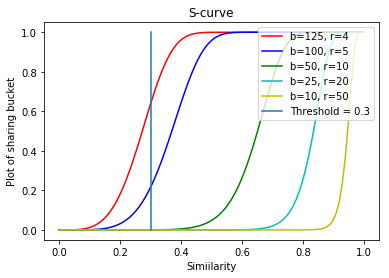

In [19]:
s = np.linspace(0,1,100)
def a(r,b, s):
    return(1-(1-s**r)**b)

plt.plot(s, a(4,125,s), 'r', label = 'b=125, r=4') 
plt.plot(s, a(5,100,s), 'b', label = 'b=100, r=5') 
plt.plot(s, a(10,50,s), 'g', label = 'b=50, r=10')
plt.plot(s, a(20,25,s), 'c', label = 'b=25, r=20')  
plt.plot(s, a(50,10,s), 'y', label = 'b=10, r=50')  
plt.plot([0.3,0.3],[0.0, 1.0], label = 'Threshold = 0.3')
plt.ylabel('Plot of sharing bucket')
plt.title('S-curve')
plt.xlabel('Simiilarity')
plt.legend(bbox_to_anchor=(1,1), loc=1)
plt.savefig('img500.png')


In [ ]:
(1-s**r)**2

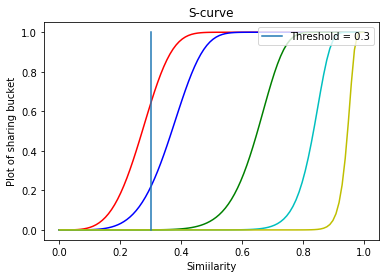

In [16]:
s = np.linspace(0,1,100)
def a(r,b, s):
    return(1-(1-s**r)**b)

plt.plot(s, a(4,125,s), 'r') # plotting t, a separately 
plt.plot(s, a(5,100,s), 'b') # plotting t, a separately 
plt.plot(s, a(10,50,s), 'g') # plotting t, a separately 
plt.plot(s, a(20,25,s), 'c') # plotting t, a separately 
plt.plot(s, a(50,10,s), 'y') # plotting t, a separately 
# plt.plot(t, b, 'b') # plotting t, b separately 
# plt.plot(t, c, 'g') # plotting t, c separately 
plt.plot([0.3,0.3],[0.0, 1.0], label = 'Threshold = 0.3')
plt.ylabel('Plot of sharing bucket')
plt.title('S-curve')
plt.xlabel('Simiilarity')
plt.legend(bbox_to_anchor=(1,1), loc=1)
plt.savefig('img500.png')


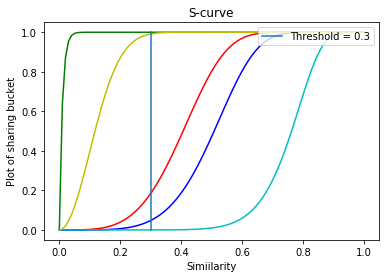

In [10]:
s = np.linspace(0,1,100)
def a(r,b, s):
    return(1-(1-s**r)**b)

plt.plot(s, a(4,25,s), 'r') # plotting t, a separately 
plt.plot(s, a(5,20,s), 'b') # plotting t, a separately 
plt.plot(s, a(1,100,s), 'g') # plotting t, a separately 
plt.plot(s, a(10,10,s), 'c') # plotting t, a separately 
plt.plot(s, a(2,50,s), 'y') # plotting t, a separately 
# plt.plot(t, b, 'b') # plotting t, b separately 
# plt.plot(t, c, 'g') # plotting t, c separately 
plt.plot([0.3,0.3],[0.0, 1.0], label = 'Threshold = 0.3')
plt.ylabel('Plot of sharing bucket')
plt.title('S-curve')
plt.xlabel('Simiilarity')
plt.legend(bbox_to_anchor=(1,1), loc=1)


In [ ]:
ii=0
rrows=4
SIG[ii:ii+rrows,:].shape

In [ ]:
#5. Construct candidate pairs by applying the LSH technique of Section 3.4.1.
#6. Examine each candidate pair's signatures and determine whether the fraction
#of components in which they agree is at least t.
#Pick a number of bands b and a number of rows r such that br = n,
#and the threshold t is approximately (1/b)^1/r
#WARNING ==> b*r = n

def apply_LSH_technique(SIG,t=0.3,bands=25,rows=4):
    if bands * rows != len(SIG):
        raise 'bands*rows must be equals to n :: bands*rows = n !!!'
    #print SIG
    #print
    array_buckets = initialize_array_bucket(bands)
    #print array_buckets
    hash_funcs = generate_hash_functions_params(bands)

    candidate = {}
#     TP = {}
#     FP = {}  #not similar but declared
    
    i = 0
    for b in range(bands):
        buckets = array_buckets[b]        
        band = SIG[i:i+rows,:]
        for col in range(band.shape[1]):
            #print(band[:,col])

            #randomly generate
            #key = 0
            #for row in xrange(rows):
            #    func = hash_funcs[row]
            #    key += hash_minHash(band[row,col],func[0],func[1],len(buckets))
            #key = int((key+sum(band[:,col])) % len(buckets))
            #randomly generate
            #func = hash_funcs[b]

            #key = int(hash_minHash(sum(band[:,col]),func[0],func[1],len(buckets)))
            #print 'key->',key
            
            key = int(sum(band[:,col]) % len(buckets))
            #print(key)
            buckets[key].append(col)
        i = i+rows
        
        
#         print(len(buckets))
        #print('buckets #',b,buckets)
#     for item in buckets:
#         if len(item) > 1:
#             pair = (item[0], item[1])
#             if pair not in candidate:
#                 A = SIG[:,item[0]]
#                 B = SIG[:,item[1]]
#                 similarity = jaccard_similarity(A,B)
#                 if similarity >= 0.3:
#                     candidate[pair] = similarity
#                 else: 
#                     FP[pair]
                    
                    
    #print 
    #sort = sorted(candidates.items(),key=itemgetter(1), reverse=True)
    #print(len(item))
    #print(candidates)
    #print(n) 
    return candidate,sort
        
SIG = compute_minHash_signatures(data,10000)

sort, candidate = apply_LSH_technique(SIG,0.3,25,4)


In [ ]:
sort



In [ ]:
len(data)


In [ ]:
plt.plot([0.3,0.3],[0.0, 1.0], label = 'Threshold = 0.3')
plt.ylabel('Plot of sharing bucket')
plt.title('S-curve')
plt.xlabel('Simiilarity')
plt.legend(bbox_to_anchor=(1,1), loc=1)
plt.show()

In [ ]:
data = data.transpose()

In [ ]:
len(data)

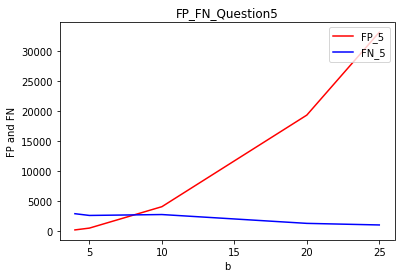

In [21]:
#Question 2: Draw the figure 1 for FP and figure 2 for FN in 5 for different choices of b

FP100 = [165,469,4046, 19351, 33195]
FN100 = [2874,2583,2734,1259, 994]
b = [4,5,10,20,25]
    
plt.plot(b, FP100, 'r', label = 'FP_5')
plt.plot(b, FN100, 'b', label = 'FN_5')

plt.ylabel('FP and FN')
plt.title('FP_FN_Question5')
plt.xlabel('b')
plt.legend(bbox_to_anchor=(1,1), loc=1)
#plt.savefig('FP_FN100_5.png')
plt.show()